In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec

In [ ]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("twilight",lut=16)
spec = cm.get_cmap("Spectral",lut =10)
c_blues = [blues(i) for i in range(13)]
c_spec = [spec(i) for i in range(10)]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})

In [79]:
siz = [5]
beta = [3.3,3.57,3.84,4.16,4.54,5,5.55,6.25,7.14,8.33,10,12.5,16.66,25]
temp = []
for i in beta:
    temp.append(round(1/i,2))

temp.reverse()

In [80]:
garr = np.linspace(0,2,201) # range of gamma value
aarr = np.linspace(0,20,21) # range of alpha value

In [60]:
aarr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

데이터와 플로팅 노트북 파일이 같은 경로상에 위치하는 경우

In [ ]:
for s in siz:
    for i in range(len(beta)):
        globals()['data{}s{}'.format(i,s)] = pd.read_csv('./OCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(s,beta[i]),header=None,delim_whitespace=True)

    for i in range(len(beta)):
        globals()['datmat{}s{}'.format(i,s)] = np.zeros((len(garr),len(aarr)))

    for k in range(len(beta)):
        for i in range(len(garr)):
            for j in range(len(aarr)):
                globals()['datmat{}s{}'.format(k,s)][i][j] = globals()['data{}s{}'.format(k,s)].loc[i][j]


데이터와 플로팅 파일이 다른 경로상에 위치하는 경우(NCA)

In [81]:
for s in siz:
    for i in range(len(beta)):
        globals()['data{}s{}'.format(i,s)] = pd.read_csv('./NCA/Nsize{}/NCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(s,s,beta[i]),header=None,delim_whitespace=True)

    for i in range(len(beta)):
        globals()['datmat{}s{}'.format(i,s)] = np.zeros((len(garr),len(aarr)))

    for k in range(len(beta)):
        for i in range(len(garr)):
            for j in range(len(aarr)):
                globals()['datmat{}s{}'.format(k,s)][i][j] = globals()['data{}s{}'.format(k,s)].loc[i][j]


데이터와 플로팅 파일이 다른 경로상에 위치하는 경우(OCA)

In [52]:
for s in siz:
    for i in range(len(beta)):
        globals()['data{}s{}'.format(i,s)] = pd.read_csv('./OCA/size{}/OCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(s,s,beta[i]),header=None,delim_whitespace=True)

    for i in range(len(beta)):
        globals()['datmat{}s{}'.format(i,s)] = np.zeros((len(garr),len(aarr)))

    for k in range(len(beta)):
        for i in range(len(garr)):
            for j in range(len(aarr)):
                globals()['datmat{}s{}'.format(k,s)][i][j] = globals()['data{}s{}'.format(k,s)].loc[i][j]


In [82]:
index_gamma = 0
index_alpha = np.arange(0,21,2)
##index_alpha = 4

index_alpha

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])



FIX ALPHA,CHANGE GAMMA

In [83]:
a = 0
for ia in index_alpha:
    for s in siz:
        for i in range(len(beta)):
            globals()['alparr{}s{}_{}'.format(i,s,ia)]=[]

        for k in range(len(beta)):
            
            for j in range(len(garr)):
                globals()['alparr{}s{}_{}'.format(k,s,ia)].append(globals()['data{}s{}'.format(k,s)].loc[j][index_alpha[a]])
    a += 1

In [84]:
a = 0
# beta 기준으로 전체 루프
for k in range(len(beta)-1):
    gam_a = []
    alp_a = []
    
    for ia in index_alpha:
        globals()['alco{}'.format(k)] = []

        for j in range(len(garr)-1):
            globals()['alco{}'.format(k)].append(globals()['alparr{}s{}_{}'.format(k,s,ia)][j]-globals()['alparr{}s{}_{}'.format(k+1,s,ia)][j+1])
        
        # alpha를 한단계씩 늘려가면서 데이터 추가시킴
        for j in range(len(garr)-2):
            if np.sign(globals()['alco{}'.format(k)][j]) != np.sign(globals()['alco{}'.format(k)][j+1]):
                gam_a.append(garr[j])
                alp_a.append(ia)
        
    df = np.column_stack((alp_a,gam_a))
    np.savetxt("NCA_size{}_beta{}_(low).txt".format(s,beta[k]),df)
    

Call data and plot (NCA)

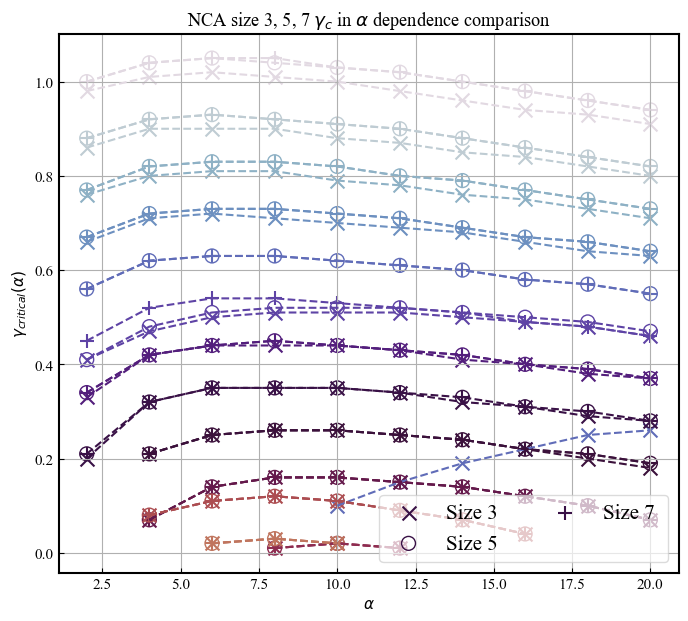

In [85]:
fig = plt.figure(figsize=(8,7))
mpl.rcParams['axes.linewidth'] = 1.5

plt.title(r"NCA size 3, 5, 7 $\gamma_c$ in $\alpha$ dependence comparison")

for i in range(len(beta)-1):
    try:
        globals()['plotdata{}'.format(i)] = pd.read_csv('./NCA_size3_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
        globals()['plotdataa{}'.format(i)] = pd.read_csv('./NCA_size5_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
        globals()['plotdatab{}'.format(i)] = pd.read_csv('./NCA_size7_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
    except:
        None

for i in range(len(beta)-1):
    try:
        if i == 7:
            plt.scatter(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],color=c_blues[i],marker = 'x' , s = 100, label = "Size 3 ") #+r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" ) 
            plt.plot(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],color=c_blues[i],marker = 'o' , s = 100, facecolors='none', label ="Size 5 ")#+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
        
            plt.scatter(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],color=c_blues[i],marker = '+' , s = 100, label ="Size 7 ")#+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],ls='--',color=c_blues[i])
        
        else:
            plt.scatter(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],color=c_blues[i],marker = 'x', s = 100)#, label = "Size 7 " +r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],color=c_blues[i],marker = 'o' ,facecolors='none', s = 100)#,label ="Size 5 "+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],color=c_blues[i],marker = '+' , s = 100)#, label ="Size 7 "+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],ls='--',color=c_blues[i])
    except:
        None


plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\gamma_{critical}(\alpha)$")

plt.grid()
plt.legend(loc='lower right', fancybox=True, framealpha=0.7,ncol=2,prop={'size': 15})
plt.show()

Call data and plot (OCA)

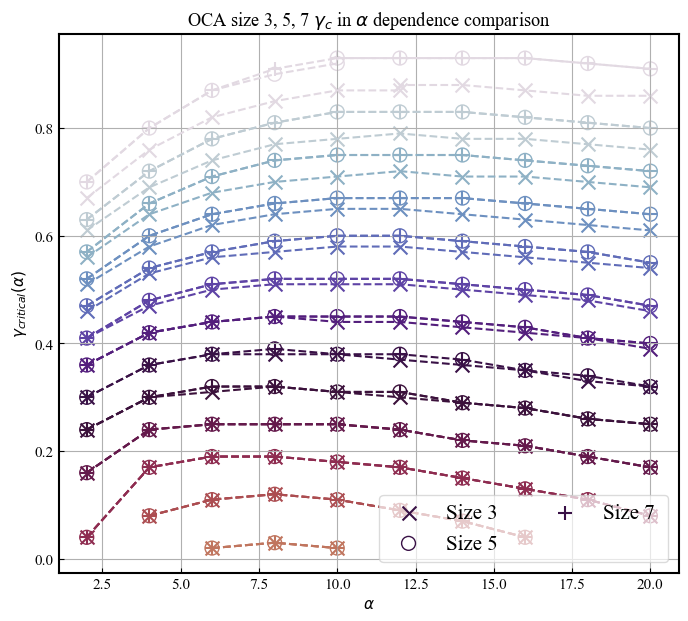

In [56]:
fig = plt.figure(figsize=(8,7))
mpl.rcParams['axes.linewidth'] = 1.5

plt.title(r"OCA size 3, 5, 7 $\gamma_c$ in $\alpha$ dependence comparison")

for i in range(len(beta)-1):
    try:
        globals()['plotdata{}'.format(i)] = pd.read_csv('./OCA_size3_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
        globals()['plotdataa{}'.format(i)] = pd.read_csv('./OCA_size5_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
        globals()['plotdatab{}'.format(i)] = pd.read_csv('./OCA_size7_beta{}_(low).txt'.format(beta[i]),header=None,delim_whitespace=True)
    except:
        None

for i in range(len(beta)-1):
    try:
        if i == 7:
            plt.scatter(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],color=c_blues[i],marker = 'x' , s = 100, label = "Size 3 ") #+r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" ) 
            plt.plot(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],color=c_blues[i],marker = 'o' , s = 100, facecolors='none', label ="Size 5 ")#+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
        
            plt.scatter(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],color=c_blues[i],marker = '+' , s = 100, label ="Size 7 ")#+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],ls='--',color=c_blues[i])
        
        else:
            plt.scatter(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],color=c_blues[i],marker = 'x', s = 100)#, label = "Size 7 " +r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdata{}'.format(i)][0],globals()['plotdata{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],color=c_blues[i],marker = 'o' ,facecolors='none', s = 100)#,label ="Size 5 "+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdataa{}'.format(i)][0],globals()['plotdataa{}'.format(i)][1],ls='--',color=c_blues[i])

            plt.scatter(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],color=c_blues[i],marker = '+' , s = 100)#, label ="Size 7 "+ r"$\beta$ = [" + str(beta[i]) + " , " + str(beta[i+1]) + "]" )
            plt.plot(globals()['plotdatab{}'.format(i)][0],globals()['plotdatab{}'.format(i)][1],ls='--',color=c_blues[i])
    except:
        None


plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\gamma_{critical}(\alpha)$")

plt.grid()
plt.legend(loc='lower right', fancybox=True, framealpha=0.7,ncol=2,prop={'size': 15})
plt.show()

In [ ]:
plt.plot(plotdata9[0],plotdata9[1])